In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import json
import regex as re
from pathlib import Path
from importlib import reload
from collections import defaultdict
import grouping
import files
import analysis as a

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

In [88]:
reload(group)

<module 'gpt_grouping' from '/home/rimov/Documents/Code/Studies/reddit-assortativity-analysis/gpt_grouping.py'>

~

In [5]:
%matplotlib notebook
plt.rcParams.update({'axes.titlesize': 'large'})
np.seterr(divide='ignore', invalid='ignore')

{'divide': 'warn', 'over': 'warn', 'under': 'ignore', 'invalid': 'warn'}

In [7]:
data_path = Path('data/chain-networks')
data_path.exists()

True

In [5]:
subreds_raw = dict()

In [6]:
# All the subreddits and their paths
subreddits_paths = [sr for sr in data_path.iterdir()]
subreddits = [sr.stem for sr in data_path.iterdir()]
print(sorted(subreddits)[:5], '...', sorted(subreddits)[-5:])

['2007scape', '240sx', '24hoursupport', '3DS', '3Dprinting'] ... ['youtubehaiku', 'yugioh', 'zelda', 'zen', 'zombies']


### Batching and Grouping In ChatGPT

In [71]:
groups = group.iterate_queries_till_full(set(subreddits), dict())

Enter "a" to save to clipboard again, "q" to quit, or paste string of dict response from ChatGPT: { 'music': {'classicalmusic'}, 'hobbies': {'tattoo', 'trackers', 'hometheater', 'martialarts', 'climbing', 'Coilporn', 'MCPE', 'EDC'}, 'health_fitness': {'BabyBumps', 'pornfree', 'swoleacceptance'}, 'science': {'archlinux'}, 'politics': {'Atlanta', 'belgium', 'nyc', 'europe', 'baltimore', 'de', 'taiwan'}, 'education': {'acting', 'design_critiques'}, 'vehicles': {'GLRP_EastBlue', 'trailerparkboys', 'Warhammer', 'Stance'}, 'media': {'whitepeoplegifs', 'history', 'breakingbad'}, 'violent': {'killlakill', 'demonssouls'}, 'other': {'Frugal', 'MyLittleAndysonic1', 'rant', 'PolishGauntlet', 'offmychest'}, 'news': {'Military', 'TwoXChromosomes', 'homestead'}, 'comedy': {'smoking', 'southpark', 'dontstarve', 'delusionalartists', 'cringepics', 'prettygirls'}, 'sports': {'battlefield_4', 'reddevils', 'fcbayern'}, 'fashion': {'MakeupAddicts', 'BeardPorn', 'asianamerican'}, 'sexual': {'LadyBoners', 'kp

In [107]:
groups_len = dict(sorted({g: len(l) for g,l in groups.items()}.items(), key=lambda x: x[1]))

<IPython.core.display.Javascript object>


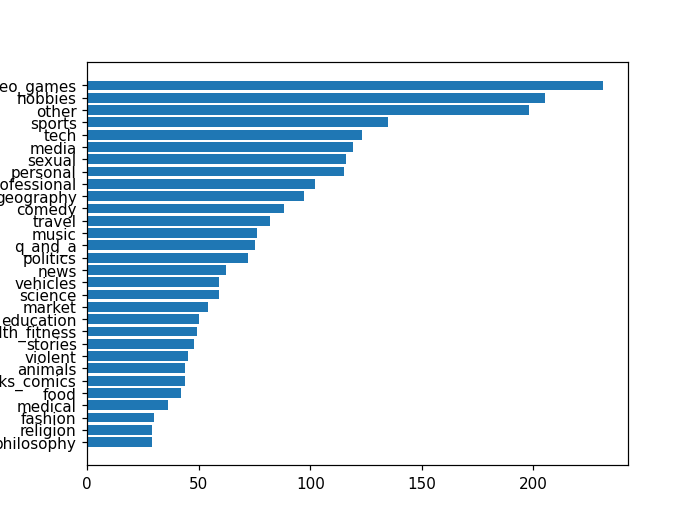

<BarContainer object of 30 artists>

In [108]:
plt.barh(list(groups_len.keys()), groups_len.values())

### Grouping 'other'

Ran through ChatGPT again, then manually grouped those that couldn't be categorized.

In [105]:
uncat = group.get_uncategorized(groups)
print(len(uncat))

1


In [106]:
uncat

{'drunkvapes'}

In [109]:
groups

{'fashion': {'ABraThatFits',
  'AsianBeauty',
  'AustralianMakeup',
  'BeardPorn',
  'BeautyBoxes',
  'FancyFollicles',
  'Hair',
  'MakeupAddiction',
  'MakeupAddicts',
  'MaleFashionMarket',
  'SkincareAddiction',
  'Sneakers',
  'TF2fashionadvice',
  'TeenMFA',
  'asianamerican',
  'braswap',
  'burstingout',
  'caps',
  'curvy',
  'entwives',
  'femalefashionadvice',
  'frugalmalefashion',
  'malefashion',
  'malefashionadvice',
  'malegrooming',
  'malehairadvice',
  'piercing',
  'streetwear',
  'supremeclothing',
  'tightdresses'},
 'market': {'ACTrade',
  'AdoptMyVillager',
  'AmateurArchives',
  'Bitcoin',
  'BitcoinMarkets',
  'BitcoinMining',
  'CryptoCurrency',
  'Dota2Trade',
  'Ebay',
  'Flipping',
  'Foodforthought',
  'GameSale',
  'GameTrade',
  'Gunsforsale',
  'Pmsforsale',
  'RBA',
  'Random_Acts_Of_Pizza',
  'SVExchange',
  'Shave_Bazaar',
  'SteamGameSwap',
  'StockMarket',
  'VapePorn',
  'YGOSales',
  'airsoftmarket',
  'beermoney',
  'beertrade',
  'buildapcsal

### Next Steps:

Will be extracting subreddit samples from each category above and comparing their statistics in hopes of discovering some insight into the groups themselves.

In [13]:
gs = defaultdict(list)
for g, s in groups.items():
    gs[g].extend(s)

In [14]:
with open('data/subreddits-grouped.json', 'w') as f:
    json.dump(gs, f)